In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [92]:
#reading in our data sets
full_df = pd.read_csv('../Data/Final_NBA_PLayers_updated.csv', index_col = 0)
# df = pd.read_csv('Data/Final_NBA_Seasons1-3.csv', index_col = 0)
df_final = pd.read_csv('../Data/Final_NBA_Seasons1-3_1977_final.csv', index_col = 0)
df_final.set_index('Player', inplace = True)

## EDA of Full Player Data set

First we'll taker a look into some analysis of the overall player data set. This includes all NBA players dating back to 1947, including those not elligible for our target. The purpose of this analysis is to show the rapid increase in player performance over the first five years and how it starts to flatten out after.

In [93]:
full_df.columns

Index(['Rk', 'Player', 'Season', 'Age', 'Tm', 'Lg', 'WS', 'G', 'GS', 'MP',
       'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%',
       'FT%', 'TS%', 'season_count', 'ppg', 'apg', 'rpg', 'spg', 'bpg', 'tpg',
       'ftpg', 'name_split', 'name', 'unique_id', 'year_split', 'award_year',
       'season_year', 'concat', 'unique_id_match', 'all_nba_first',
       'all_nba_second', 'all_nba_third', 'all_rookie_1', 'all_rookie_2',
       'all_d_1', 'all_d_2', 'roy', 'PER', '3PAr', 'FTr', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS',
       'DWS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

<AxesSubplot:xlabel='season_count', ylabel='ppg'>

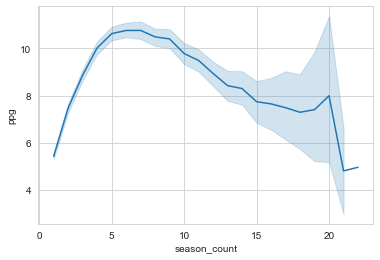

In [94]:
sns.lineplot(x = full_df['season_count'], y = full_df['ppg'])

<AxesSubplot:xlabel='season_count', ylabel='WS'>

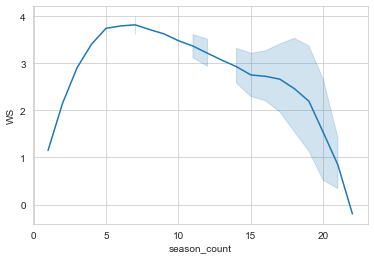

In [95]:
sns.lineplot(x = full_df['season_count'], y = full_df['WS'])

<AxesSubplot:xlabel='season_count', ylabel='VORP'>

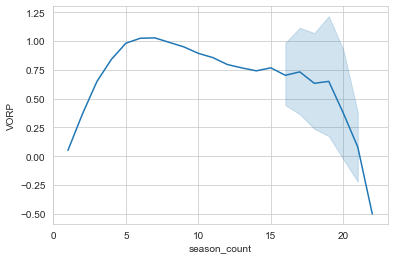

In [96]:
sns.lineplot(x = full_df['season_count'], y = full_df['VORP'])

As shown in the above line plots, NBA players PPG, 'Win-Share' and 'Value Over Replacement Player' all tend to rapidly increase in the first four seasons and peak in seasons five and six. Then begings to steadily recline over the remainder of thier career.

## Qualified Data Set EDA

In [97]:
#this is to eliminate 2 outliers where PER was very high due to low minutes played in season 3.
df_final['PER_3'] = np.where(df_final.PER_3 > 34, 0, df_final.PER_3)
df_final.head()

G     GS      MP   FG   FGA   2P   2PA     3P  \
Player                                                                    
A.C. Green\greenac01    243  137.0  6418.0  847  1615  846  1602    1.0   
A.J. Price\priceaj01    150    3.0  2228.0  318   848  191   437  127.0   
Aaron Brooks\brookaa01  213  117.0  5525.0  984  2339  626  1396  358.0   
Aaron Gordon\gordoaa01  205  117.0  4958.0  760  1652  628  1195  132.0   
Aaron Gray\grayaa01     149   19.0  1639.0  226   453  226   451    0.0   

                          3PA   FT  ...  DWS_1-2  DWS_2-3  PER_1-2  PER_2-3  \
Player                              ...                                       
A.C. Green\greenac01     13.0  615  ...      1.3      0.1      3.9     -1.2   
A.J. Price\priceaj01    411.0  142  ...     -0.1     -0.2     -3.3      0.8   
Aaron Brooks\brookaa01  943.0  436  ...      1.4     -0.6     -0.2      3.1   
Aaron Gordon\gordoaa01  457.0  329  ...      1.5     -0.5      5.6     -2.5   
Aaron Gray\grayaa01       2.0  110  ...      0.0     -0.4     -2.4      5.1   

                        USG_1-2  USG_2-3  VORP_1-2  VORP_2-3  target  \
Player                                                                 
A.C. Green\greenac01        0.0      0.0       1.5      -0.2       0   
A.J. Price\priceaj01        0.0     -5.0      -0.5       0.3       0   
Aaron Brooks\brookaa01      1.1      2.8       0.3       1.3       0   
Aaron Gordon\gordoaa01      1.8      2.8       1.6      -0.8       0   
Aaron Gray\grayaa01        -7.5      1.9       0.0       0.3       0   

                        Qualified  
Player                             
A.C. Green\greenac01          1.0  
A.J. Price\priceaj01          1.0  
Aaron Brooks\brookaa01        1.0  
Aaron Gordon\gordoaa01        1.0  
Aaron Gray\grayaa01           1.0  

[5 rows x 216 columns]

In [98]:
#YoY categorial variable increases
df_final['VORP_Incr'] = np.where((df_final['VORP_1-2'] > 0) & (df_final['VORP_2-3'] > 0),1,0) 
df_final['PER_Incr'] = np.where((df_final['PER_1-2'] > 0) & (df_final['PER_2-3'] > 0),1,0) 
df_final['USG_Incr'] = np.where((df_final['USG_1-2'] > 0) & (df_final['USG_2-3'] > 0),1,0)
df_final['WS_Incr'] = np.where((df_final['WS_1-2'] > 0) & (df_final['WS_2-3'] > 0),1,0)
df_final['PPG_Incr'] = np.where((df_final['PPG_1-2'] > 0) & (df_final['PPG_2-3'] > 0),1,0)

### Target Players

In [99]:
#shows our class imbalance
df_final['target'].value_counts()

0    1183
1      90
Name: target, dtype: int64

Taking a look at our list below - you can see a lot of familiar and household NBA names. Our target represents the elite of the elite NBA talent post 1977. 

In [100]:
qual_players = df_final[df_final['target'] == 1]
list(qual_players.index)

['Al Horford\\horfoal01',
 'Allen Iverson\\iversal01',
 "Amar'e Stoudemire\\stoudam01",
 'Andre Drummond\\drumman01',
 'Andrew Bogut\\bogutan01',
 'Anfernee Hardaway\\hardaan01',
 'Anthony Davis\\davisan02',
 'Antonio McDyess\\mcdyean01',
 'Baron Davis\\davisba01',
 'Bernard King\\kingbe01',
 'Blake Griffin\\griffbl01',
 'Brad Daugherty\\daughbr01',
 'Brandon Roy\\roybr01',
 'Carlos Boozer\\boozeca01',
 'Carmelo Anthony\\anthoca01',
 'Charles Barkley\\barklch01',
 'Chris Bosh\\boshch01',
 'Chris Mullin\\mullich01',
 'Chris Paul\\paulch01',
 'Chris Webber\\webbech01',
 'Clyde Drexler\\drexlcl01',
 'Dale Ellis\\ellisda01',
 'Damian Lillard\\lillada01',
 'David Robinson\\robinda01',
 'DeMarcus Cousins\\couside01',
 'Dennis Rodman\\rodmade01',
 'Deron Williams\\willide01',
 'Derrick Coleman\\colemde01',
 'Dirk Nowitzki\\nowitdi01',
 'Dominique Wilkins\\wilkido01',
 'Draymond Green\\greendr01',
 'Dwight Howard\\howardw01',
 'Dwyane Wade\\wadedw01',
 'Eddie Jones\\jonesed02',
 'Fat Lever\\le

In [101]:
df_final.head()

G     GS      MP   FG   FGA   2P   2PA     3P  \
Player                                                                    
A.C. Green\greenac01    243  137.0  6418.0  847  1615  846  1602    1.0   
A.J. Price\priceaj01    150    3.0  2228.0  318   848  191   437  127.0   
Aaron Brooks\brookaa01  213  117.0  5525.0  984  2339  626  1396  358.0   
Aaron Gordon\gordoaa01  205  117.0  4958.0  760  1652  628  1195  132.0   
Aaron Gray\grayaa01     149   19.0  1639.0  226   453  226   451    0.0   

                          3PA   FT  ...  USG_2-3  VORP_1-2  VORP_2-3  target  \
Player                              ...                                        
A.C. Green\greenac01     13.0  615  ...      0.0       1.5      -0.2       0   
A.J. Price\priceaj01    411.0  142  ...     -5.0      -0.5       0.3       0   
Aaron Brooks\brookaa01  943.0  436  ...      2.8       0.3       1.3       0   
Aaron Gordon\gordoaa01  457.0  329  ...      2.8       1.6      -0.8       0   
Aaron Gray\grayaa01       2.0  110  ...      1.9       0.0       0.3       0   

                        Qualified  VORP_Incr  PER_Incr  USG_Incr  WS_Incr  \
Player                                                                      
A.C. Green\greenac01          1.0          0         0         0        1   
A.J. Price\priceaj01          1.0          0         0         0        0   
Aaron Brooks\brookaa01        1.0          1         0         1        1   
Aaron Gordon\gordoaa01        1.0          0         0         1        0   
Aaron Gray\grayaa01           1.0          0         0         0        0   

                        PPG_Incr  
Player                            
A.C. Green\greenac01           1  
A.J. Price\priceaj01           0  
Aaron Brooks\brookaa01         1  
Aaron Gordon\gordoaa01         1  
Aaron Gray\grayaa01            0  

[5 rows x 221 columns]

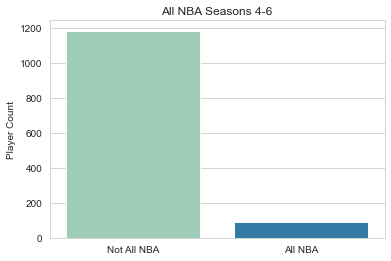

In [102]:
#target barchart showing class imbalance
sns.barplot(x = df_final['target'].value_counts().index, y = df_final['target'].value_counts(), palette = 'YlGnBu')
plt.title('All NBA Seasons 4-6')
plt.ylabel('Player Count')
plt.xticks([0,1],['Not All NBA', 'All NBA'])
plt.savefig('target_barchart.png',
           transparent = True)

#### YoY Scatter Plots 

In these year-over-year scatterplots below, I was hoping to visualize the statistical increase occuring between Season 1 & 2 and Season 2 & 3 and how it correlates to All-NBA players. Unfortunately, this was not the case suggesting that All-NBA talent arrive in the league playing at a very high caliber already and does always need to show drastic improvement YoY.

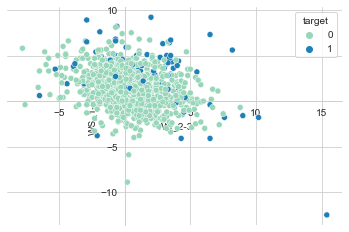

In [103]:
plot = sns.scatterplot(x = df_final['WS_2-3'], y = df_final['WS_1-2'], hue = df_final['target'], palette = 'YlGnBu')

plot.spines['left'].set_position('zero')
plot.spines['right'].set_color('none')
plot.spines['bottom'].set_position('zero')
plot.spines['top'].set_color('none')

plt.show(plot)

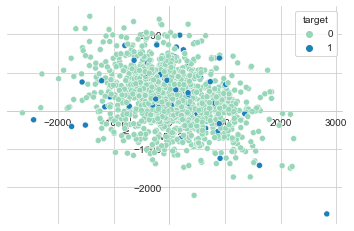

In [104]:
plot = sns.scatterplot(x = df_final['MP_2-3'], y = df_final['MP_1-2'], hue = df_final['target'], palette = 'YlGnBu')

plot.spines['left'].set_position('zero')
plot.spines['right'].set_color('none')
plot.spines['bottom'].set_position('zero')
plot.spines['top'].set_color('none')

plt.show(plot)

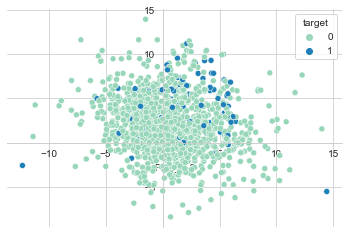

In [105]:
plot = sns.scatterplot(x = df_final['PPG_2-3'], y = df_final['PPG_1-2'], hue = df_final['target'], palette = 'YlGnBu')

plot.spines['left'].set_position('zero')
plot.spines['right'].set_color('none')
plot.spines['bottom'].set_position('zero')
plot.spines['top'].set_color('none')

plt.show(plot)

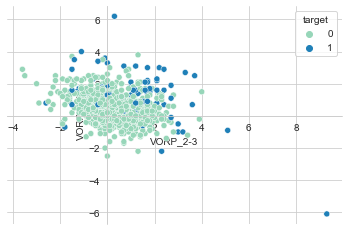

In [106]:
plot = sns.scatterplot(x = df_final['VORP_2-3'], y = df_final['VORP_1-2'], hue = df_final['target'], palette = 'YlGnBu')

plot.spines['left'].set_position('zero')
plot.spines['right'].set_color('none')
plot.spines['bottom'].set_position('zero')
plot.spines['top'].set_color('none')

plt.show(plot)

### Statistical Scatter Plots

The following scatterplots below are showing the correlation between Season 3 advanced statisitcs & total points and All-NBA players. As you can see as we move higher on each axis - more and more All-NBA points are showing on the graph representing a strong correlation.

<AxesSubplot:xlabel='PTS', ylabel='WS_3'>

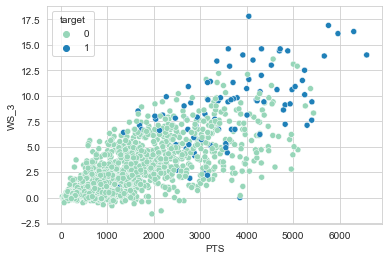

In [107]:
sns.scatterplot(x = df_final.PTS, y = df_final.WS_3, hue = df_final['target'], palette = 'YlGnBu')

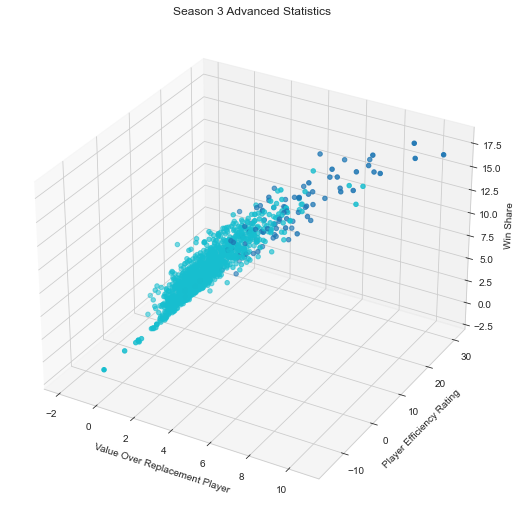

In [108]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.scatter3D(xs = df_final.VORP_3, ys = df_final.PER_3, zs = df_final.WS_3, c= df_final.target, cmap = 'tab10_r')
plt.title('Season 3 Advanced Statistics')
plt.xlabel('Value Over Replacement Player')
plt.ylabel('Player Efficiency Rating')
ax.set_zlabel('Win Share')
# ax.legend(labels = df_final.target)
# plt.savefig('Season 3 Scatter',
#            transparent = True)
plt.show()

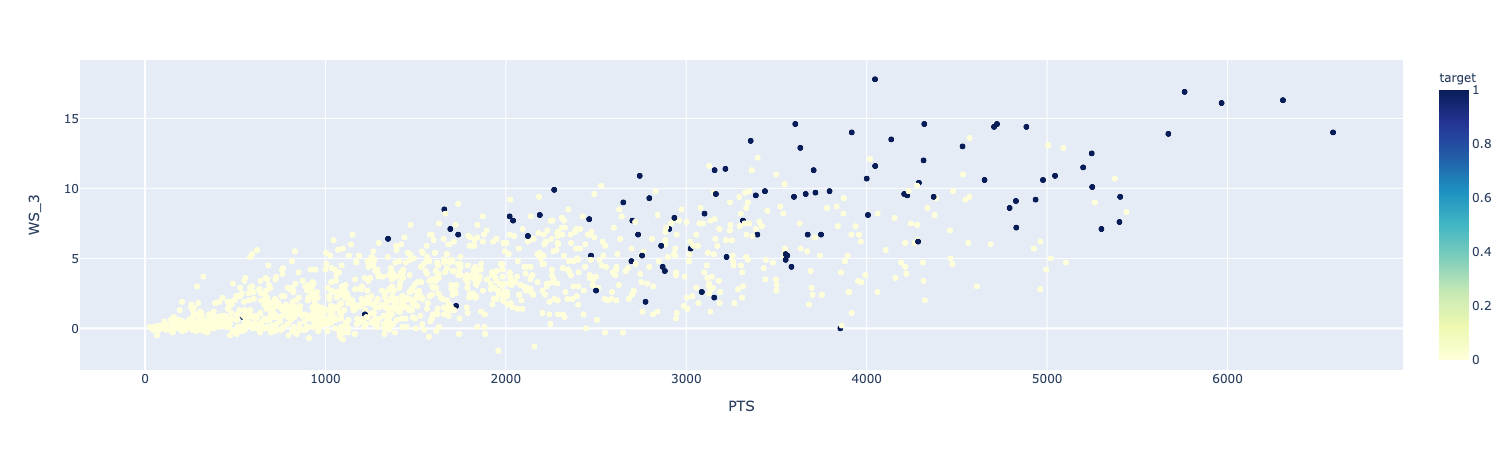

In [109]:
px.scatter(df_final, x = 'PTS', y ='WS_3', color = 'target', color_continuous_scale='YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='PER_3'>

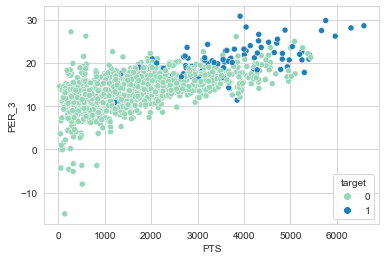

In [110]:
sns.scatterplot(x = df_final.PTS, y = df_final.PER_3, hue = df_final['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS_3', ylabel='VORP_3'>

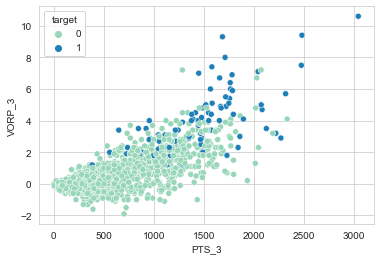

In [111]:
sns.scatterplot(x = df_final.PTS_3, y = df_final.VORP_3, hue = df_final['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='G'>

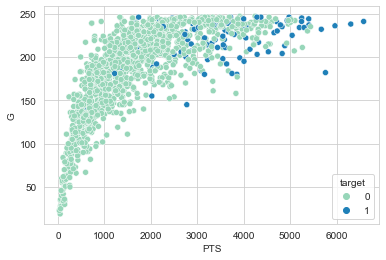

In [112]:
sns.scatterplot(x = df_final.PTS, y = df_final.G, hue = df_final['target'], palette = 'YlGnBu')

<AxesSubplot:xlabel='PTS', ylabel='GS'>

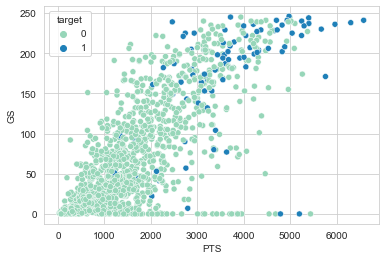

In [113]:
sns.scatterplot(x = df_final.PTS, y = df_final.GS, hue = df_final['target'], palette = 'YlGnBu')

## Correlation Analysis

Starting with 200+ features we needed to analyze which ones actually make an impact with our target variable. The plot below shows the correlation relationship of each feature and our target. Unfortunately, all of the year-over-year features that I feature enginered show very little correlation and will likely not be included in the final models. Season 3 advanced statistics and seasons 1-3 totals appear to correlate the most with our target.

After this analysis, I rremoved features with less than a 20% correlation with our target.

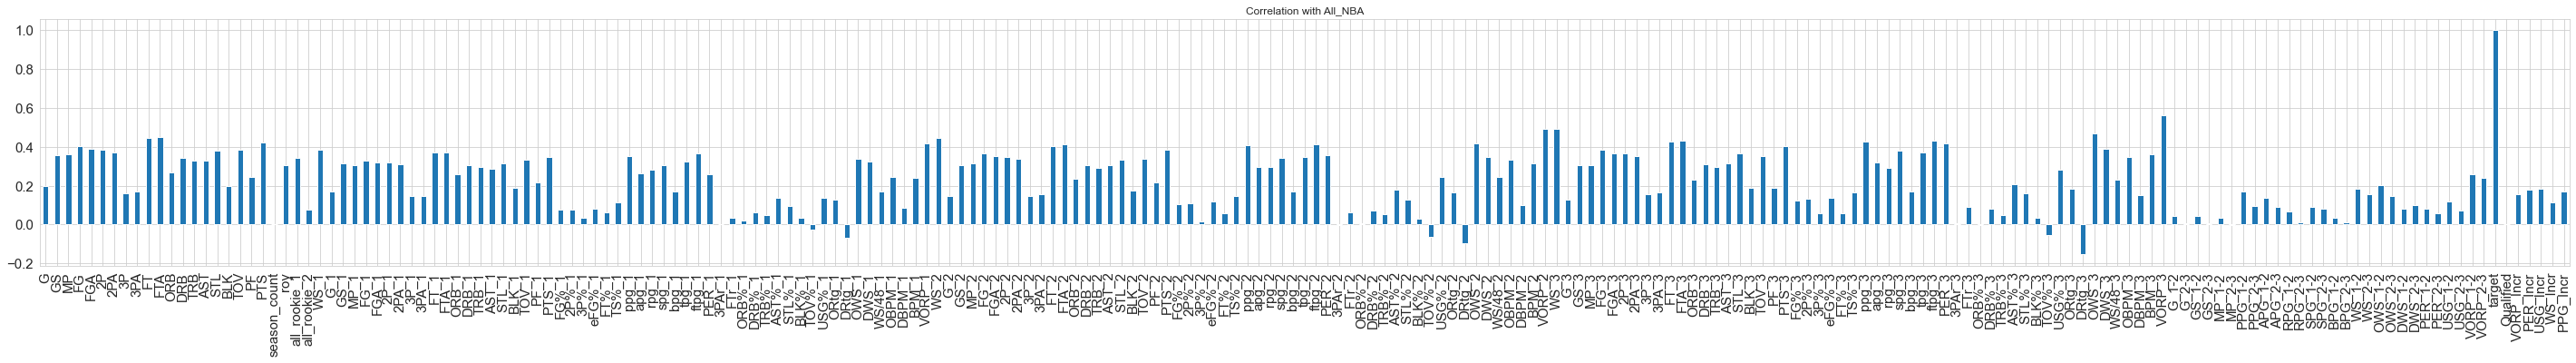

In [114]:
df_final.corrwith(df_final.target).plot.bar(figsize = (50, 5), title = "Correlation with All_NBA", 
                                        fontsize = 15,rot = 90, grid = True);

In [115]:
#removing features w/ low correlation
cols = ['GS','MP','FG','FGA','2P','2PA','FT','FTA','ORB','DRB','TRB','AST','STL','TOV','PTS','roy','all_rookie_1','WS_1','GS_1','MP_1','FG_1','FGA_1','2P_1',
        '2PA_1','FT_1','FTA_1','ORB_1','DRB_1','TRB_1','AST_1','STL_1','BLK_1','TOV_1','PF_1','PTS_1','ppg_1','apg_1','rpg_1','spg_1','bpg_1',
        'tpg_1','ftpg_1','PER_1','OWS_1','DWS_1','WS/48_1','OBPM_1','BPM_1','VORP_1','WS_2','GS_2','MP_2','FG_2','FGA_2','2P_2','2PA_2',
        'FT_2','FTA_2','ORB_2','DRB_2','TRB_2','AST_2','STL_2','BLK_2','TOV_2','PF_2','PTS_2','ppg_2','apg_2','rpg_2','spg_2','bpg_2','tpg_2','ftpg_2','PER_2','USG%_2',
        'ORtg_2','OWS_2','DWS_2','WS/48_2','OBPM_2','BPM_2','VORP_2','WS_3','G_3','GS_3','MP_3','FG_3','FGA_3','2P_3','2PA_3','FT_3',
        'FTA_3','ORB_3','DRB_3','TRB_3','AST_3','STL_3','BLK_3','TOV_3','PF_3','PTS_3','TS%_3','ppg_3','apg_3','rpg_3','spg_3','bpg_3','tpg_3','ftpg_3','PER_3','USG%_3',
        'ORtg_3','OWS_3','DWS_3','WS/48_3','OBPM_3','BPM_3','VORP_3','target',]

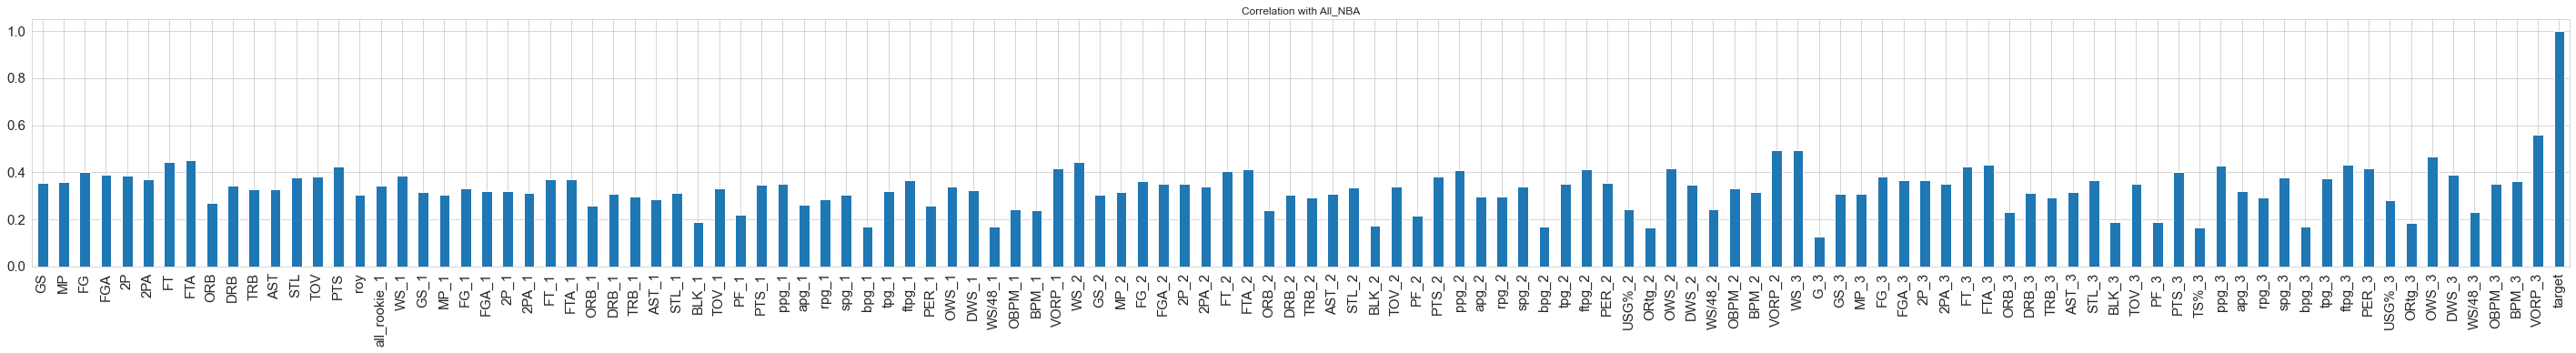

In [116]:
#correlation plot w/ higher correlated features only
df_final[cols].corrwith(df_final[cols].target).plot.bar(figsize = (50, 5), title = "Correlation with All_NBA", 
                                        fontsize = 15,rot = 90, grid = True);

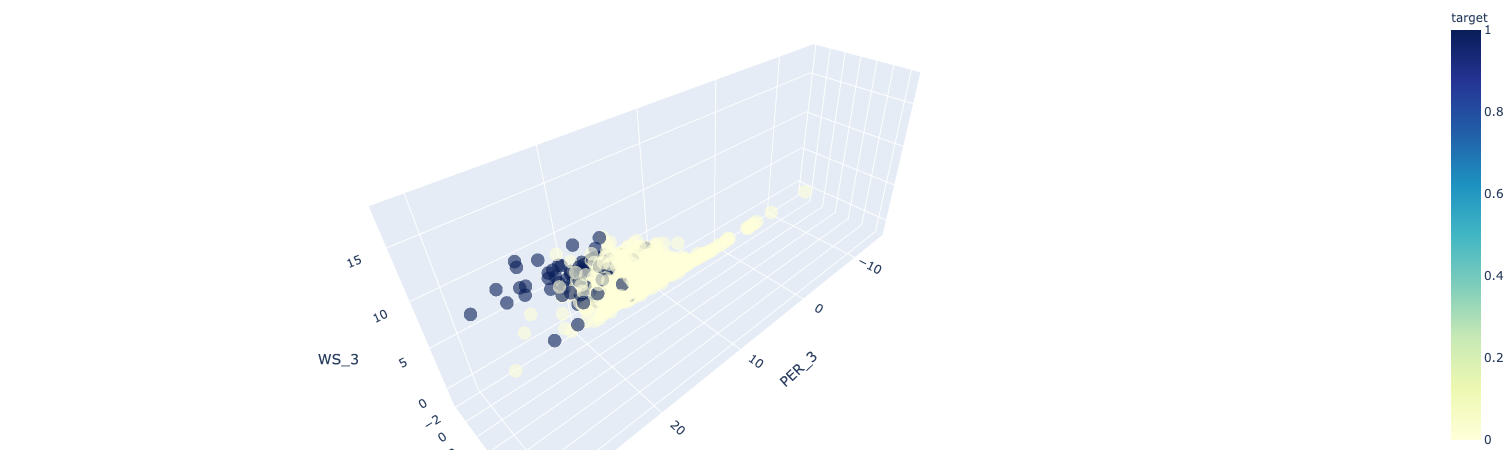

In [117]:
#interactive 3D plot of season 3 advanced statistics, showing the value they hold while assessing All-NBA players in seasons 4-6.
fig = px.scatter_3d(df_final, x='PER_3', y='VORP_3', z='WS_3', color='target', size_max=10, opacity=0.6,\
                   color_continuous_scale='YlGnBu')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#### Boxplots showing the IQR's of statistical totals for All-NBA vs Non All-NBA players.

<AxesSubplot:xlabel='target', ylabel='PTS'>

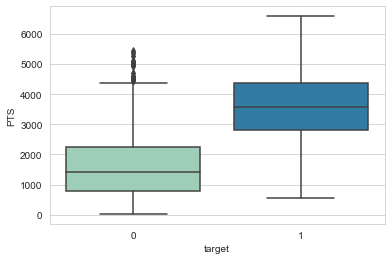

In [118]:
sns.boxplot(x = df_final['target'], y = df_final['PTS'], palette = 'YlGnBu')

<AxesSubplot:xlabel='target', ylabel='GS'>

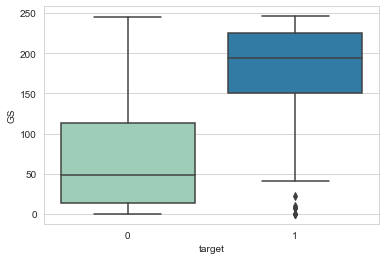

In [119]:
sns.boxplot(x = df_final['target'], y = df_final['GS'], palette = 'YlGnBu')

<AxesSubplot:xlabel='target', ylabel='G'>

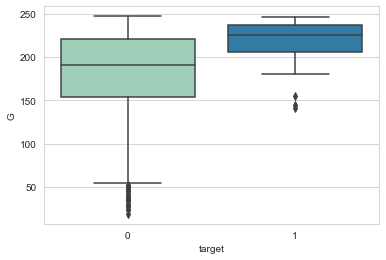

In [120]:
sns.boxplot(x = df_final['target'], y = df_final['G'], palette = 'YlGnBu')

The boxplots above show that while there certainly are outliers in our data set, on average, All-NBA players scored more points, started more games and played slighty more games overall.

## Additional EDA after Recursive Feature Elimination

Using RFE to reduce the number of features we will pass through our model is great for reducing multidimensionality, but it does not take into account any features that might be over correlated with one-another. The two heatmaps below show our initial heatmap correlation of our featires selected through RFE and then a second heatmap with dropped correlated features.

In [121]:
#features selected through RFE process
rfe_cols = ['2P', 'TRB', 'PTS', 'spg_1', 'ppg_2', 'PER_2', 'MP_3', 'PTS_3', 'TS%_3',
       'spg_3', 'PER_3', 'VORP_3', 'target']

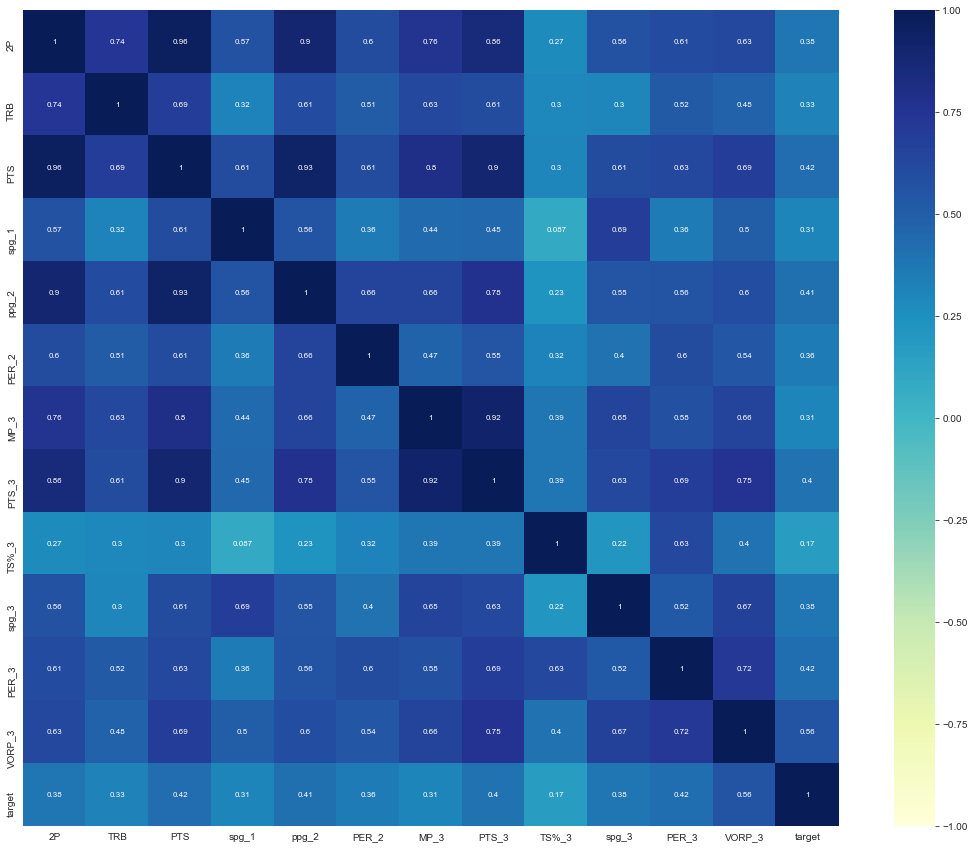

In [122]:
# df_final[rfe_cols].corr()

nba_corr = df_final[rfe_cols].corr()
plt.subplots(figsize=(20,15))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, 
    annot=True, 
    annot_kws={"fontsize":8},
    xticklabels = nba_corr.columns.values, # x labels
    yticklabels = nba_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = "YlGnBu", # color palette
    square = True) # each cell will be square-shaped
plt.show();

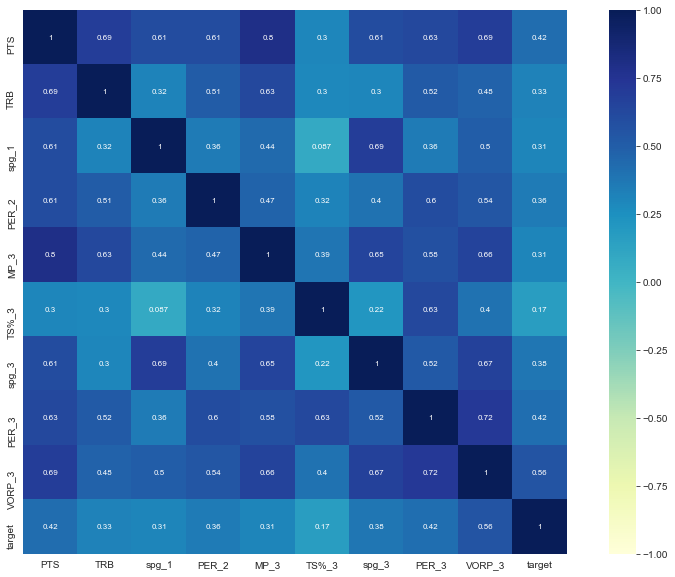

In [123]:
#dropping '2P' and others as it is correlated w/ multiple features, anything over .9
rfe_cols = ['PTS', 'TRB', 'spg_1', 'PER_2', 'MP_3', 'TS%_3',
       'spg_3', 'PER_3', 'VORP_3', 'target']

nba_corr = df_final[rfe_cols].corr()
plt.subplots(figsize=(15,10))

corr = nba_corr
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

sns.heatmap(corr, 
    annot=True, 
    annot_kws={"fontsize":8},
    xticklabels = nba_corr.columns.values, # x labels
    yticklabels = nba_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = "YlGnBu", # color palette
    square = True) # each cell will be square-shaped
plt.show();

### Pair Plots

The pairplot below plots the non-overly correlated RFE selected features against one another and the hue represents whether each data points hits our target or not. 

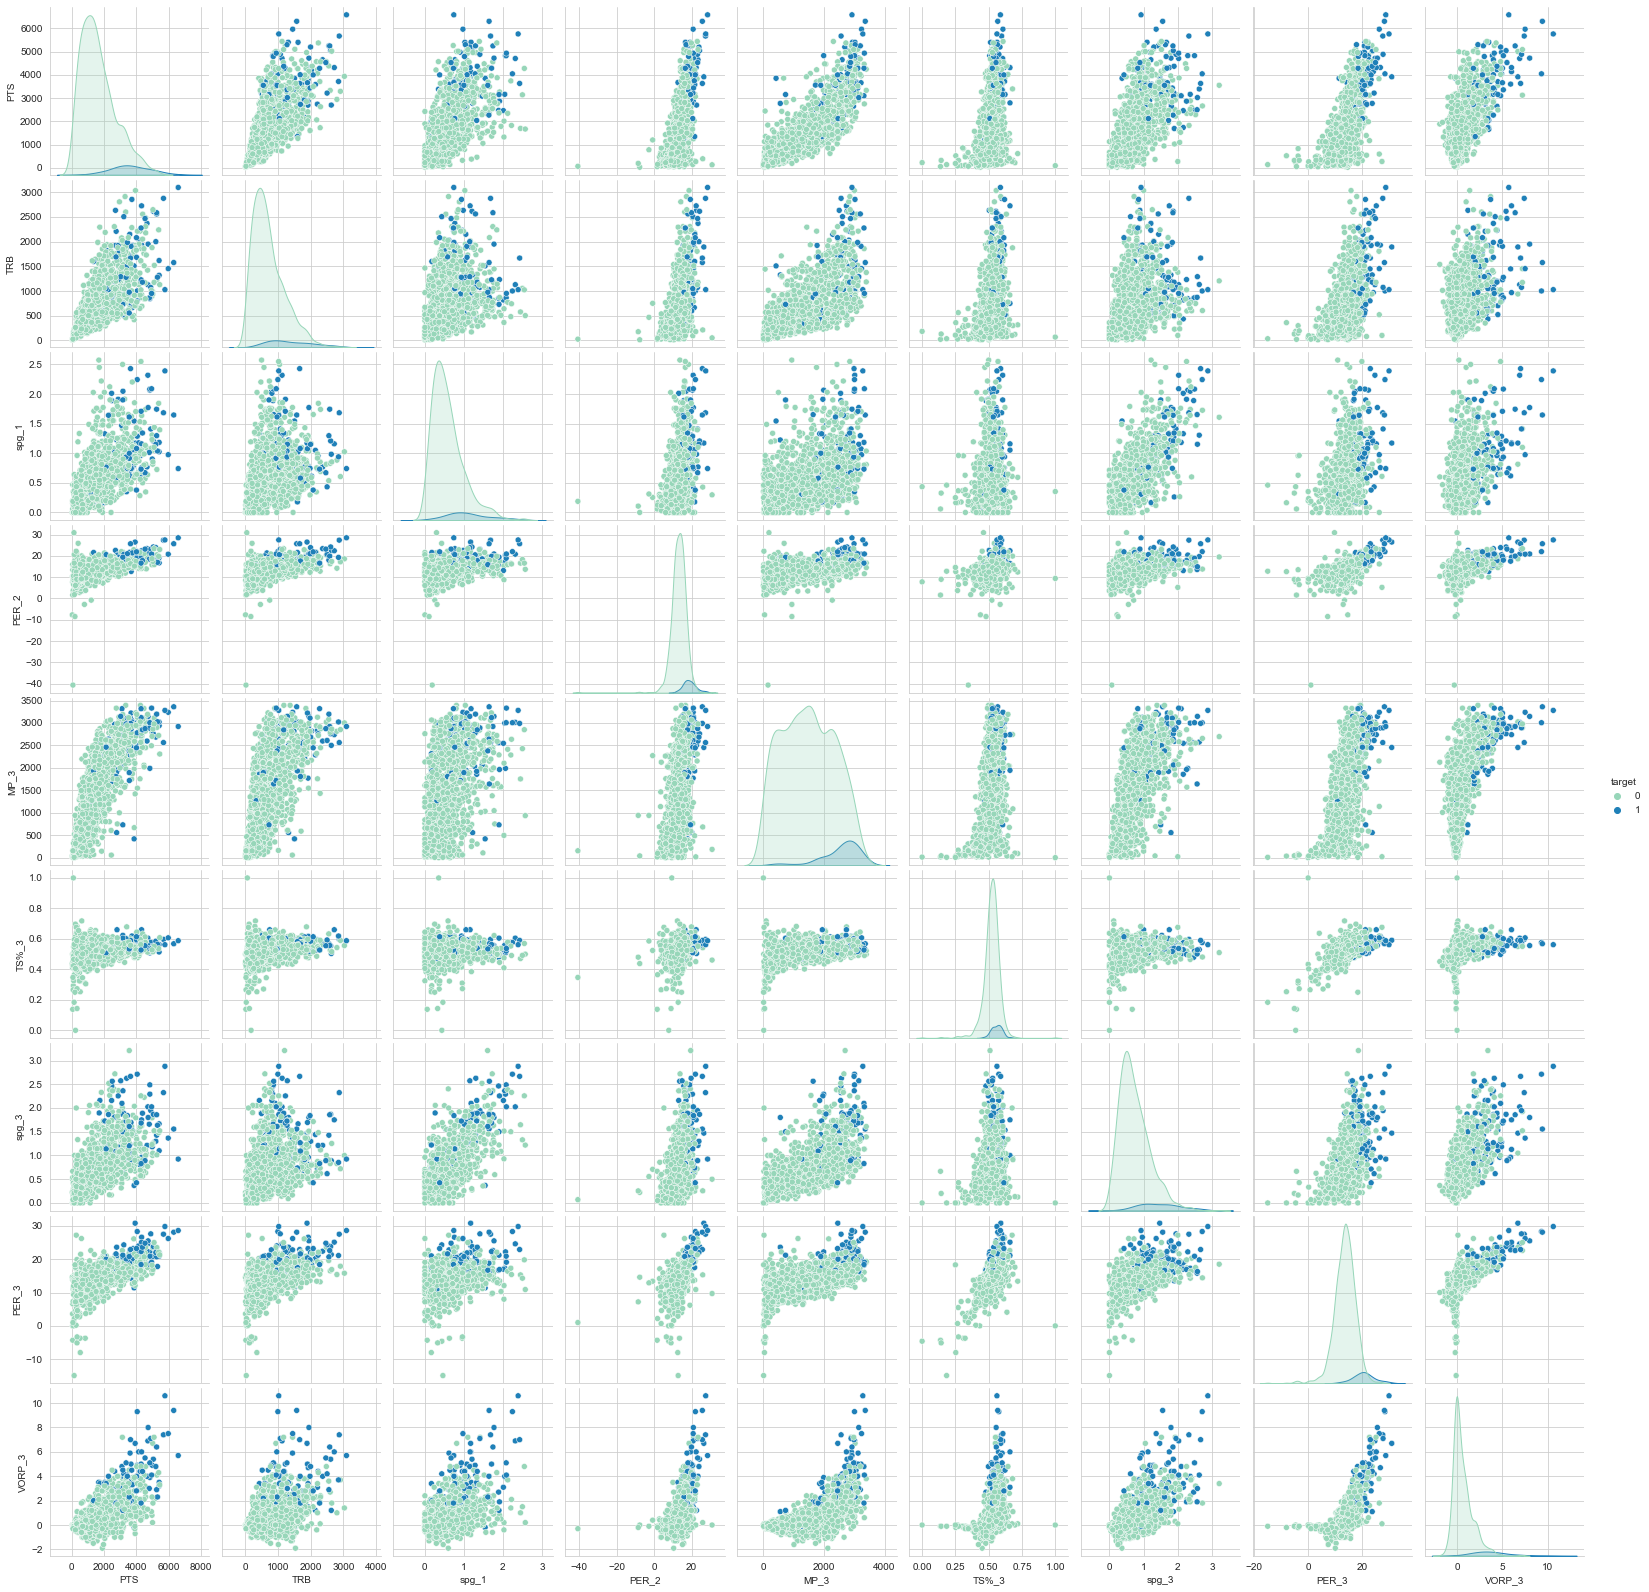

In [124]:
#Pairplot showing the relationship between RFE selected features and All NBA selections

pair_plt_stats = df_final[rfe_cols]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

# plt.savefig('nba_pair_plt.png')
plt.show();

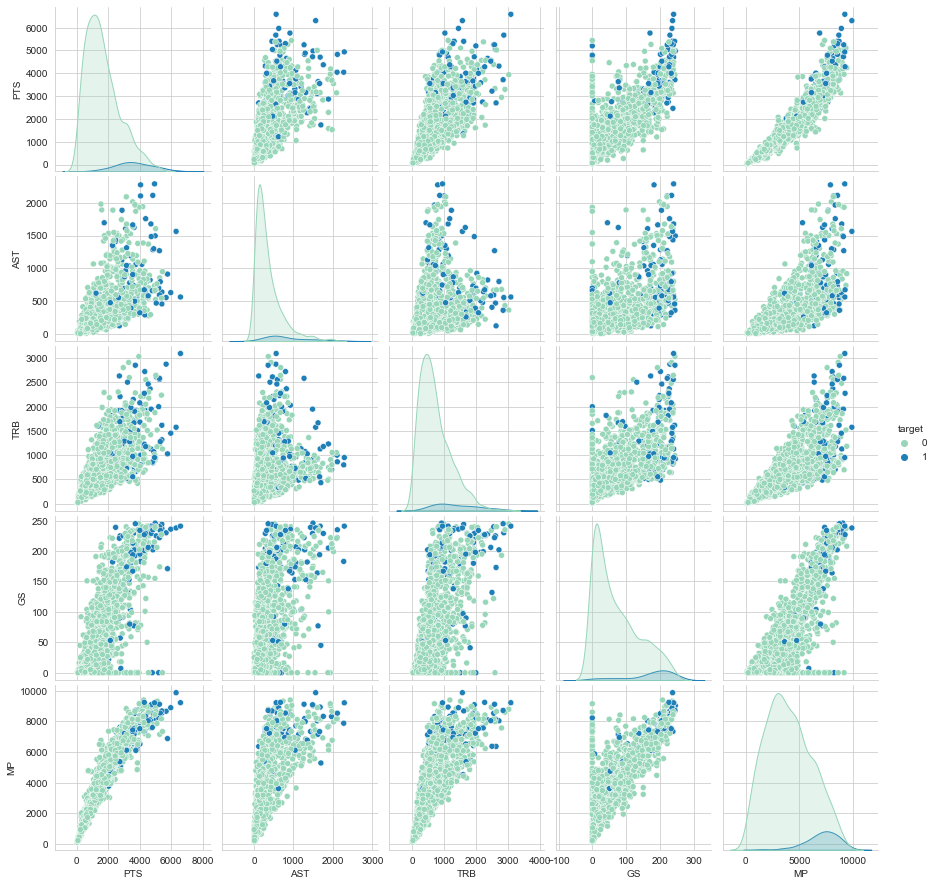

In [125]:
#shortened pairplot highlighting just major statistic totals and how they seperate ALL NBA players from the majority of NBA players.

pair_plt_stats = df_final[['PTS','AST','TRB','GS', 'MP','target']]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

plt.savefig('nba_pair_plt_basic.png',
           transparent = True)
plt.show();

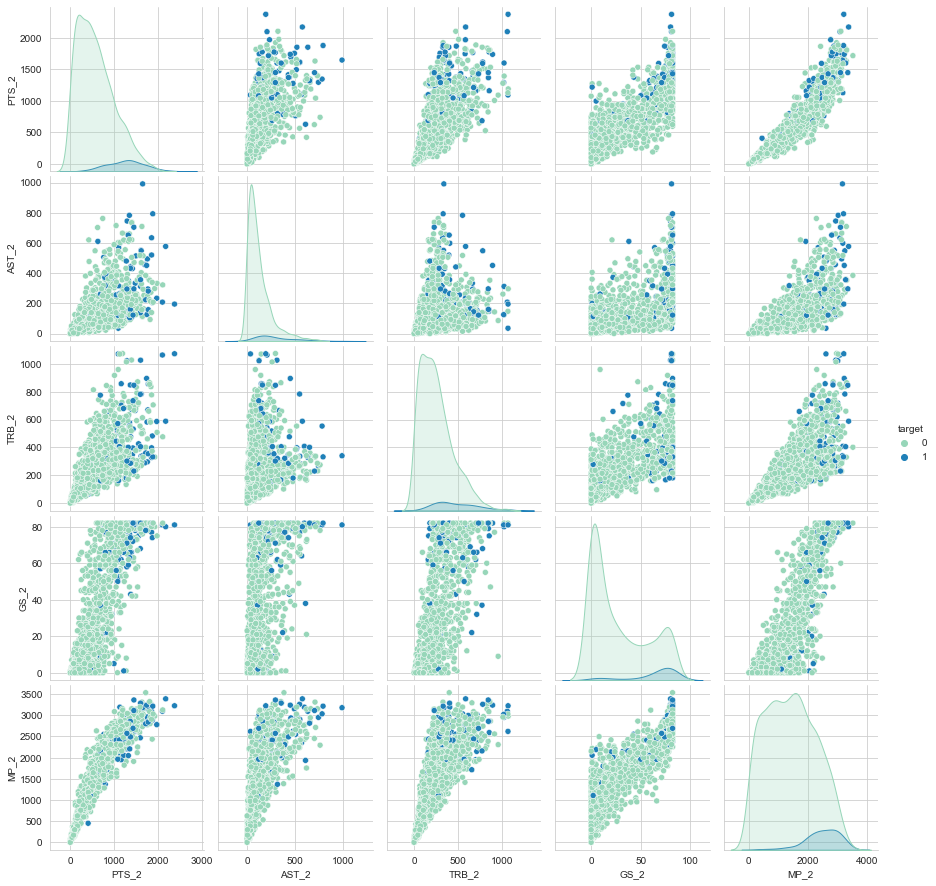

In [127]:
#Season 2 statistics pairplot

pair_plt_stats = df_final[['PTS_2','AST_2','TRB_2','GS_2', 'MP_2','target']]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

# plt.savefig('nba_pair_plt_basic_3.png',
#            transparent = True)
plt.show();

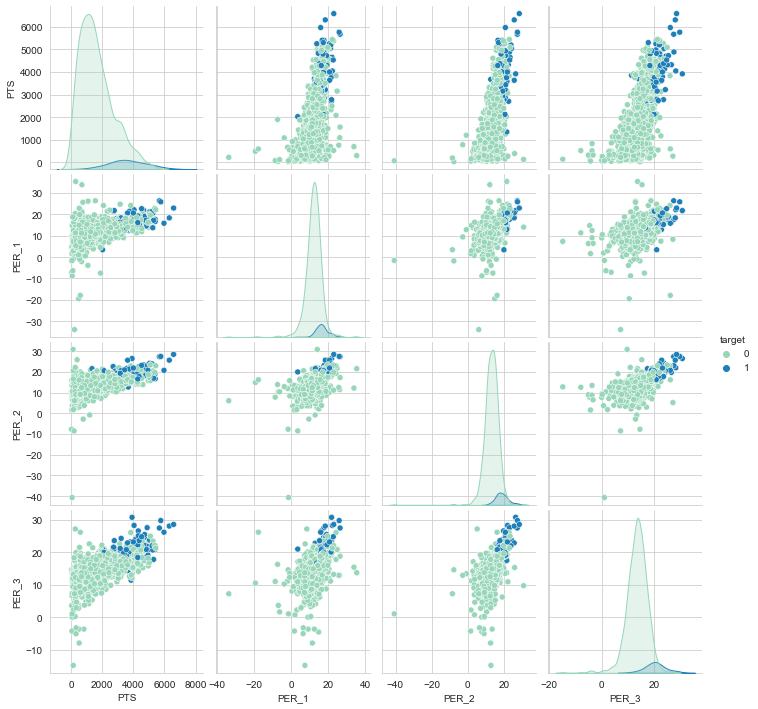

In [131]:
#Season over season PER pairplots

pair_plt_stats = df_final[['PTS','PER_1','PER_2','PER_3','target']]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

# plt.savefig('nba_pair_plt_adv.png')
# plt.show();

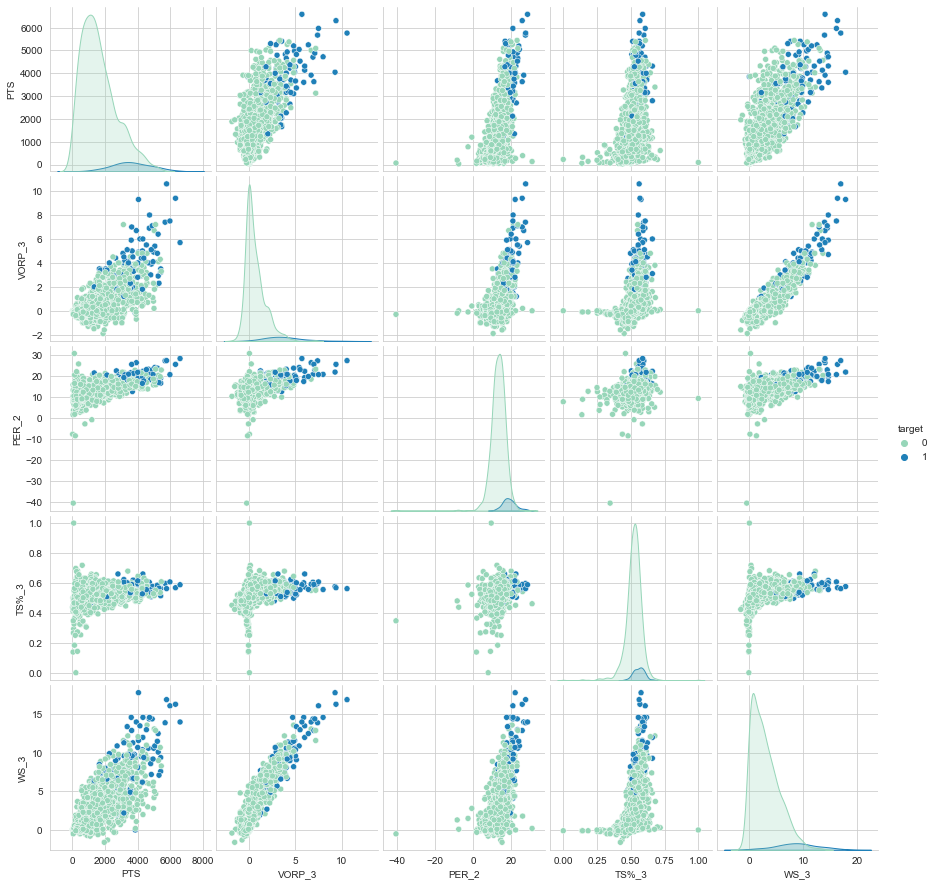

In [129]:
#Top RFE feature pairplot

pair_plt_stats = df_final[['PTS','VORP_3','PER_2','TS%_3','WS_3','target']]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

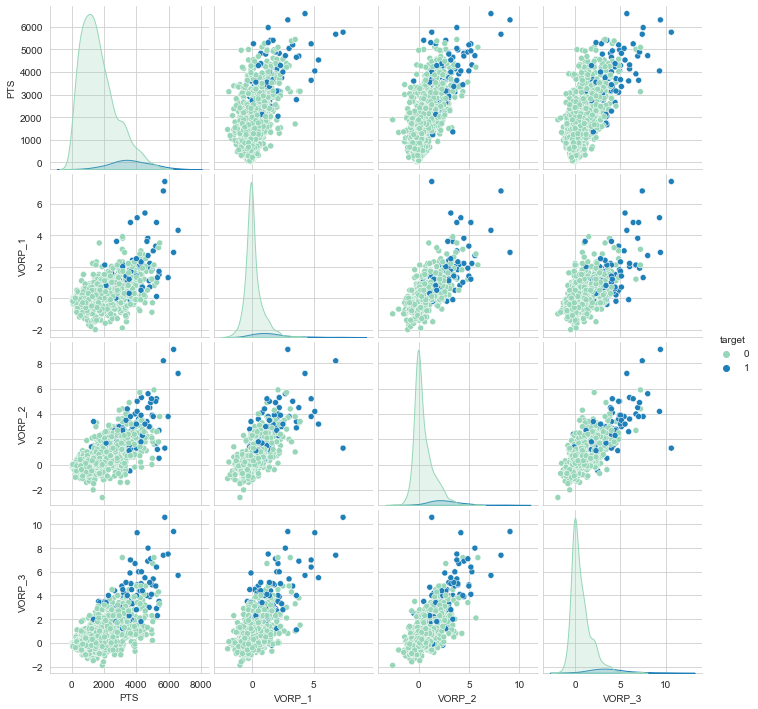

In [132]:
#VORP seasonal pairplot

pair_plt_stats = df_final[['PTS','VORP_1','VORP_2','VORP_3','target']]

sns.pairplot(pair_plt_stats, hue = 'target', palette = 'YlGnBu')

The pairplots above to do great job visualizing the continuous data we have in this data set. These plots only included features selected through our recurisve feature elimination and you can see why. Almost all of the individual plots within the overall pairplots show a great distinction between All-NBA and non All-NBA players. This gives us great confidence to move forward with these features as we enter our final modeling process. 